### Задание 1.
Загрузить с finance.yahoo данные по какому-то стоку, который выплачивает дивиденды (например, XOM). И создать на питоне табличку, для их анализа, аналогичную историческим данным на Yahoo finance

In [1]:
import pandas as pd
import datetime
import yfinance as yf

In [2]:
ticker = yf.Ticker("XOM")

In [3]:
ticker.info

{'regularMarketPrice': None,
 'preMarketPrice': None,
 'logo_url': '',
 'trailingPegRatio': None}

In [4]:
hist = ticker.history()

In [5]:
hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-08-09 00:00:00-04:00,107.826102,109.522198,107.429353,108.669189,19919600,0.00,0
2023-08-10 00:00:00-04:00,109.294070,110.722357,108.550169,109.224640,15837200,0.00,0
2023-08-11 00:00:00-04:00,109.472610,111.158785,109.155212,110.920738,14043700,0.00,0
2023-08-14 00:00:00-04:00,110.771956,111.069519,109.879272,111.010002,12973400,0.00,0
2023-08-15 00:00:00-04:00,110.750000,110.860001,107.970001,108.160004,14909600,0.91,0


In [6]:
hist.Dividends.unique()

array([0.  , 0.91])

In [7]:
ticker.dividends

Date
2023-08-15 00:00:00-04:00    0.91
Name: Dividends, dtype: float64

### Задание 2.
Избавить данные от дивидендов. Считаем коэффициент Adj Close/Close и умножаем на него все остальные цены, в таблице. В таблице можно оставить только новые adjusted цены, столбец  с датой и объемом работать будем только с ними.


In [8]:
hist = yf.download('AAPL')
hist.head(5)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099450,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094261,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087343,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089504,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092099,73449600


In [9]:
hist['Open_adj'] = hist.apply(lambda x: x[0] * x[4]/x[3], axis=1)

In [10]:
hist['High_adj'] = hist.apply(lambda x: x[1] * x[4]/x[3], axis=1)
hist['Low_adj'] = hist.apply(lambda x: x[2] * x[4]/x[3], axis=1)

In [11]:
hist.head()

,Open,High,Low,Close,Adj Close,Volume,Open_adj,High_adj,Low_adj
Date,,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099450,469033600,0.099450,0.099882,0.099450
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094261,175884800,0.094694,0.094694,0.094261
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087343,105728000,0.087775,0.087775,0.087343
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089504,86441600,0.089504,0.089937,0.089504
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092099,73449600,0.092099,0.092532,0.092099


In [12]:
hist = hist.drop(['Open', 'High', 'Low', 'Close'], axis=1)

In [13]:
hist

,Adj Close,Volume,Open_adj,High_adj,Low_adj
Date,,,,,
1980-12-12,0.099450,469033600,0.099450,0.099882,0.099450
1980-12-15,0.094261,175884800,0.094694,0.094694,0.094261
1980-12-16,0.087343,105728000,0.087775,0.087775,0.087343
1980-12-17,0.089504,86441600,0.089504,0.089937,0.089504
1980-12-18,0.092099,73449600,0.092099,0.092532,0.092099
...,...,...,...,...,...
2023-09-01,189.460007,45732600,189.490005,189.919998,188.279999
2023-09-05,189.699997,45280000,188.279999,189.979996,187.610001
2023-09-06,182.910004,81755800,188.399994,188.850006,181.470001


### Задание 3.
Визуализировать какие-то данные, построить график цены закрытия, например. Можно построить несколько разных цен на одном графике, можно, попробовать построить столбчатую диаграмму объема.


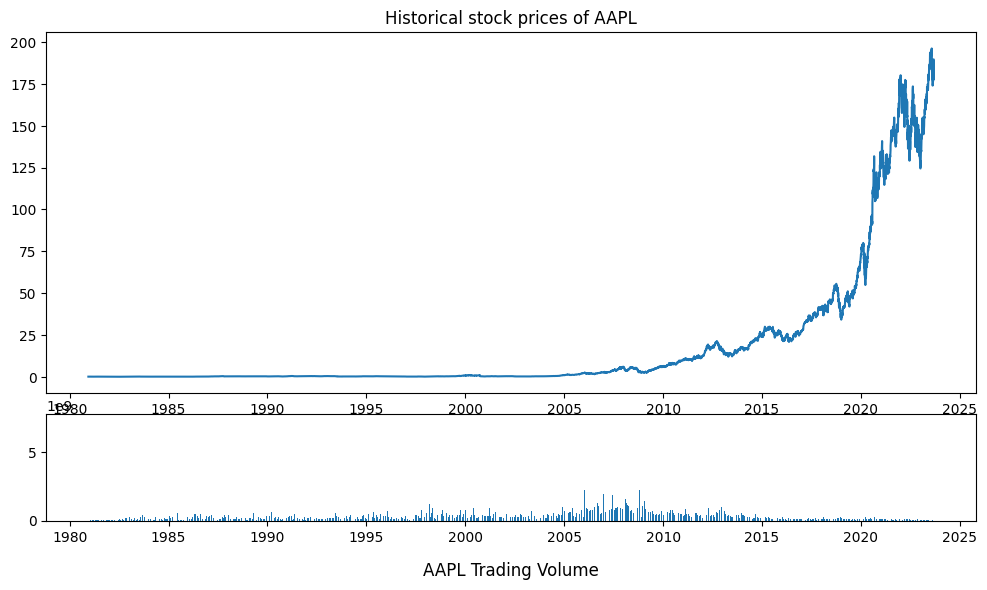

In [14]:
import matplotlib.pyplot as plt

top_plt = plt.subplot2grid((5,4), (0, 0), rowspan=3, colspan=4)
top_plt.plot(hist.index, hist["Adj Close"])

plt.title('Historical stock prices of AAPL')
bottom_plt = plt.subplot2grid((5,4), (3,0), rowspan=1, colspan=4)
bottom_plt.bar(hist.index, hist['Volume'])
plt.title('\nAAPL Trading Volume', y=-0.60)
plt.gcf().set_size_inches(12,8)

### Задание 4.
Проверить данные на корректность. Написать скрипты, которые проверяют:
Что сток торгуется во все торговые дни (можно это сделать, например, сравнением с индексом QQQ, который явно торгуется каждый день)
Между ценами выполняются нужные неравенства (все цены уже избавлены от дивидендов) то есть:
Low ≤ Open ≤ High
Low ≤ Close ≤ High



In [15]:
def quotes_correctness(open, close, low, high):
    """
    :param open: corresponding price
    :param close: corresponding price
    :param low: corresponding price
    :param high: corresponding price
    :return: True if Low <= Open <= High and Low <= Close <= High, False otherwise
    """
    if (low <= open <= high) and (low <= close <= high):
        return True
    else:
        return False

In [16]:
hist['Correctness'] = hist.apply(lambda x: quotes_correctness(x[2], x[0], x[4], x[3]), axis=1)

In [17]:
hist.head()

,Adj Close,Volume,Open_adj,High_adj,Low_adj,Correctness
Date,,,,,,
1980-12-12,0.099450,469033600,0.099450,0.099882,0.099450,True
1980-12-15,0.094261,175884800,0.094694,0.094694,0.094261,True
1980-12-16,0.087343,105728000,0.087775,0.087775,0.087343,True
1980-12-17,0.089504,86441600,0.089504,0.089937,0.089504,True
1980-12-18,0.092099,73449600,0.092099,0.092532,0.092099,True


In [18]:
hist.Correctness.unique()

array([ True])

Hence, all quotes are given correctly

In [19]:
qqq_hist = yf.download('QQQ')
qqq_hist.head(5)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-03-10,51.12500,51.156250,50.28125,51.0625,43.778336,5232000
1999-03-11,51.43750,51.734375,50.31250,51.3125,43.992676,9688600
1999-03-12,51.12500,51.156250,49.65625,50.0625,42.920994,8743600
1999-03-15,50.43750,51.562500,49.90625,51.5000,44.153431,6369000
1999-03-16,51.71875,52.156250,51.15625,51.9375,44.528530,4905800


In [20]:
print('QQQ dates range')
print(qqq_hist.iloc[[0]].index)
print(qqq_hist.iloc[[-1]].index)
print()

print('AAPL dates range')
print(hist.iloc[[0]].index)
print(hist.iloc[[-1]].index)

QQQ dates range
DatetimeIndex(['1999-03-10'], dtype='datetime64[ns]', name='Date', freq=None)
DatetimeIndex(['2023-09-08'], dtype='datetime64[ns]', name='Date', freq=None)

AAPL dates range
DatetimeIndex(['1980-12-12'], dtype='datetime64[ns]', name='Date', freq=None)
DatetimeIndex(['2023-09-08'], dtype='datetime64[ns]', name='Date', freq=None)


In [21]:
print(set(qqq_hist.index) & set(hist.index) == set(qqq_hist.index))

True


Hence, AAPL traded every day QQQ traded

### Задание 5.
Сгладить график цены закрытия. Для этого в каждый день записываем среднее  за N прошлых, включая его (на примере N = 5(розовый) и 21(голубой)).


In [22]:
hist['SMA_5'] = hist['Adj Close'].rolling(5).mean()
hist['SMA_21'] = hist['Adj Close'].rolling(21).mean()

In [23]:
hist.dropna(inplace=True)

In [24]:
hist.head()

,Adj Close,Volume,Open_adj,High_adj,Low_adj,Correctness,SMA_5,SMA_21
Date,,,,,,,,
1981-01-13,0.105503,23049600,0.105936,0.105936,0.105503,True,0.107319,0.107294
1981-01-14,0.105936,14291200,0.105936,0.106368,0.105936,True,0.107146,0.107603
1981-01-15,0.108098,14067200,0.108098,0.108962,0.108098,True,0.107838,0.108262
1981-01-16,0.107233,13395200,0.107665,0.107665,0.107233,True,0.107233,0.109209
1981-01-19,0.113718,41574400,0.113718,0.114151,0.113718,True,0.108098,0.110362


<AxesSubplot:xlabel='Date'>

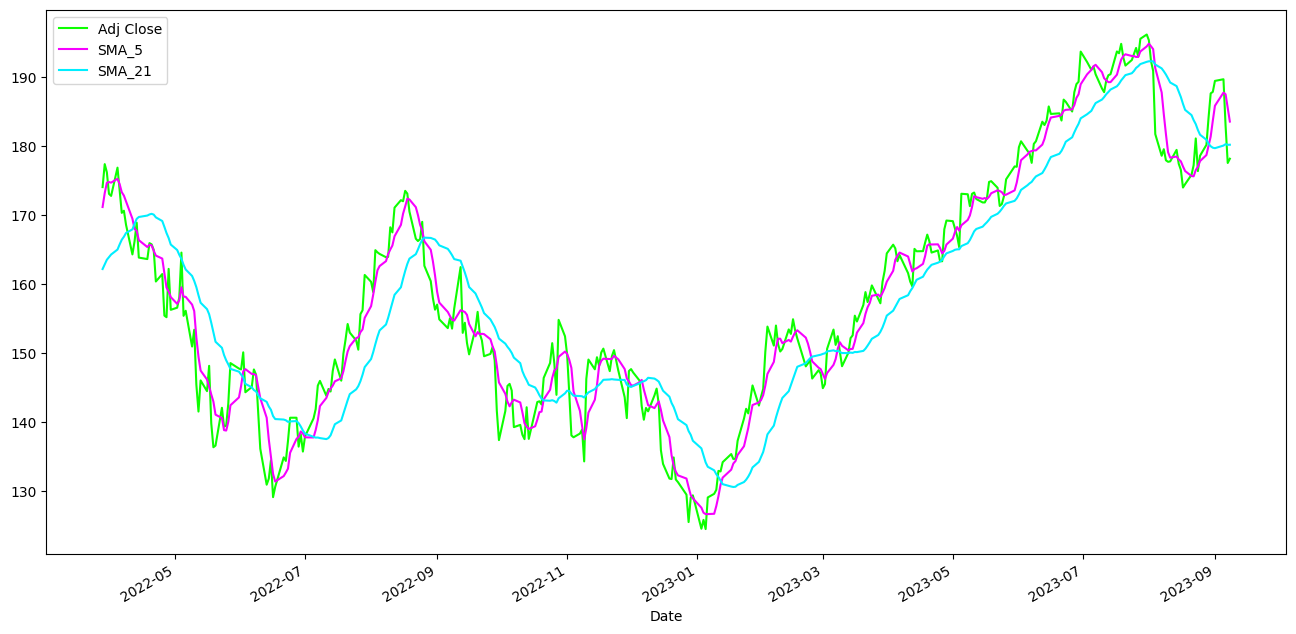

In [25]:
hist[['Adj Close', 'SMA_5', 'SMA_21']][10390:].plot(color=['#0dff00', '#f700ff', '#00eeff'], label='AAPL SMA for the  year',
                                  figsize=(16, 8))